In [2]:
import torch
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score



In [3]:
# Load your embeddings and labels
train_embeddings = torch.load('Fine_tuned_embeddings/train_embeddings.pt').cpu().numpy()
test_embeddings = torch.load('Fine_tuned_embeddings/test_embeddings.pt').cpu().numpy()
val_embeddings = torch.load('Fine_tuned_embeddings/val_embeddings.pt').cpu().numpy()

train_labels = torch.load('Fine_tuned_embeddings/train_labels_tensor.pt').cpu().numpy()
test_labels = torch.load('Fine_tuned_embeddings/test_labels_tensor.pt').cpu().numpy()
val_labels = torch.load('Fine_tuned_embeddings/val_labels_tensor.pt').cpu().numpy()

In [4]:


# Normalize the embeddings (Optional but recommended)
scaler = StandardScaler()
train_embeddings = scaler.fit_transform(train_embeddings)





In [5]:
test_embeddings = scaler.transform(test_embeddings)


In [6]:
val_embeddings = scaler.transform(val_embeddings)

In [31]:
from sklearn.utils import shuffle
from sklearn.linear_model import SGDClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score ,roc_curve ,auc, precision_recall_curve

In [10]:
# Shuffle the data
train_embeddings, train_labels = shuffle(train_embeddings, train_labels, random_state=42)

In [12]:
# Initialize the SGDClassifier with a linear SVM
sgd_classifier = SGDClassifier(loss='hinge', max_iter=1000, tol=1e-3, random_state=42)

In [15]:
# Train in batches
batch_size = 1024  # Adjust batch size based on your memory capacity
for i in range(0, len(train_embeddings), batch_size):
    batch_embeddings = train_embeddings[i:i + batch_size]
    batch_labels = train_labels[i:i + batch_size]
    sgd_classifier.partial_fit(batch_embeddings, batch_labels, classes=np.unique(train_labels))


In [16]:
# Evaluate the classifier
train_predictions = sgd_classifier.predict(train_embeddings)


In [17]:
test_predictions = sgd_classifier.predict(test_embeddings)
val_predictions = sgd_classifier.predict(val_embeddings)

In [23]:
# Calculate precision, recall, and F1-score for train, validation, and test sets
def calculate_metrics(labels, predictions, set_name):
    accuracy = accuracy_score(labels, predictions)
    precision = precision_score(labels, predictions, average='binary')
    recall = recall_score(labels, predictions, average='binary')
    f1 = f1_score(labels, predictions, average='binary')

    print(f"\n{set_name} Set Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

In [25]:
# Calculate and display metrics for each set
calculate_metrics(train_labels, train_predictions, 'Training')

# Print detailed classification reports for each set
print("\nClassification Report (Training Set):")
print(classification_report(train_labels, train_predictions))




Training Set Metrics:
Accuracy: 0.9094
Precision: 0.8855
Recall: 0.9405
F1 Score: 0.9122

Classification Report (Training Set):
              precision    recall  f1-score   support

           0       0.94      0.88      0.91     92741
           1       0.89      0.94      0.91     92801

    accuracy                           0.91    185542
   macro avg       0.91      0.91      0.91    185542
weighted avg       0.91      0.91      0.91    185542



In [26]:
calculate_metrics(val_labels, val_predictions, 'Validation')


print("\nClassification Report (Validation Set):")
print(classification_report(val_labels, val_predictions))





Validation Set Metrics:
Accuracy: 0.9069
Precision: 0.8811
Recall: 0.9408
F1 Score: 0.9099

Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.94      0.87      0.90     11593
           1       0.88      0.94      0.91     11600

    accuracy                           0.91     23193
   macro avg       0.91      0.91      0.91     23193
weighted avg       0.91      0.91      0.91     23193



In [27]:
calculate_metrics(test_labels, test_predictions, 'Test')
print("\nClassification Report (Test Set):")
print(classification_report(test_labels, test_predictions))


Test Set Metrics:
Accuracy: 0.9107
Precision: 0.8852
Recall: 0.9438
F1 Score: 0.9136

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.94      0.88      0.91     11593
           1       0.89      0.94      0.91     11600

    accuracy                           0.91     23193
   macro avg       0.91      0.91      0.91     23193
weighted avg       0.91      0.91      0.91     23193



Training Accuracy:  0.9094167358333962
Validation Accuracy:  0.9068684516880093
Test Accuracy:  0.9106626999525719


Training Accuracy:  0.9094167358333962
Validation Accuracy:  0.9068684516880093
Test Accuracy:  0.9106626999525719

Precision (Test Set): 0.8851875808538163
Recall (Test Set): 0.9437931034482758
F1 Score (Test Set): 0.9135514018691588

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.94      0.88      0.91     11593
           1       0.89      0.94      0.91     11600

    accuracy                           0.91     23193
   macro avg       0.91      0.91      0.91     23193
weighted avg       0.91      0.91      0.91     23193



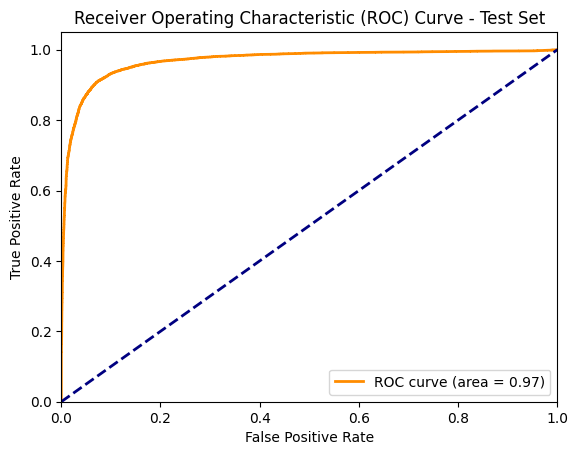

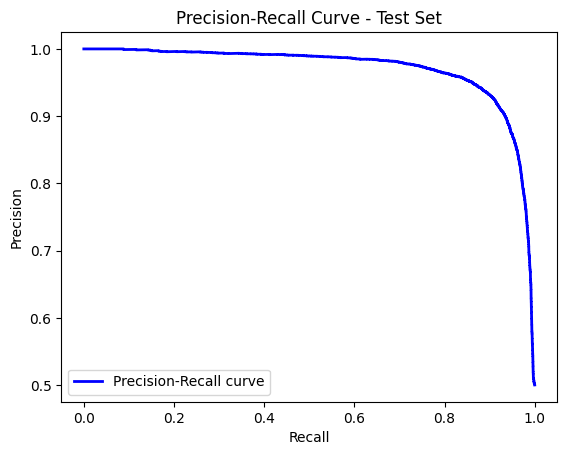

In [32]:
# Plot ROC curve and Precision-Recall curve
def plot_roc_curve(labels, predictions, set_name):
    fpr, tpr, _ = roc_curve(labels, predictions)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - {set_name} Set')
    plt.legend(loc='lower right')
    plt.show()

def plot_precision_recall_curve(labels, predictions, set_name):
    precision, recall, _ = precision_recall_curve(labels, predictions)
    plt.figure()
    plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {set_name} Set')
    plt.legend(loc='lower left')
    plt.show()

# For ROC and Precision-Recall curves, we need probabilities, not just class predictions
# `decision_function` outputs the distance from the hyperplane, which is used for ROC and PR curves
#train_scores = sgd_classifier.decision_function(train_embeddings)
test_scores = sgd_classifier.decision_function(test_embeddings)
#val_scores = sgd_classifier.decision_function(val_embeddings)

# Plotting curves
#plot_roc_curve(train_labels, train_scores, 'Training')
#plot_roc_curve(val_labels, val_scores, 'Validation')
plot_roc_curve(test_labels, test_scores, 'Test')

#plot_precision_recall_curve(train_labels, train_scores, 'Training')
#plot_precision_recall_curve(val_labels, val_scores, 'Validation')
plot_precision_recall_curve(test_labels, test_scores, 'Test')